# 📊 Comprehensive EDA of Tips Dataset: A Data Scientist's Guide

**Creating Publication-Ready Analysis with Beautiful Visualizations & Actionable Insights**

---
## **Tips EDA analysis**

- **Author: Eng.Hassan Jameel**
- **linkedin Platform: [linkedin](https://www.linkedin.com/in/hassanjameel/)**
- **Github Platform: [Github](https://github.com/HassanJamel/)**
- **Email Address: ha007ssan@gmail.com**
---

## 🎯 Table of Contents
1. Introduction & Business Context
2. Setup & Imports
3. Dataset Overview
4. Data Quality Assessment
5. Univariate Analysis
6. Bivariate Analysis
7. Multivariate Analysis
8. Correlation Analysis
9. Outlier Detection & Treatment
10. Feature Engineering
11. Preprocessing Pipeline
12. Key Insights & Recommendations
13. Next Steps for Beginners
14. Conclusion

---

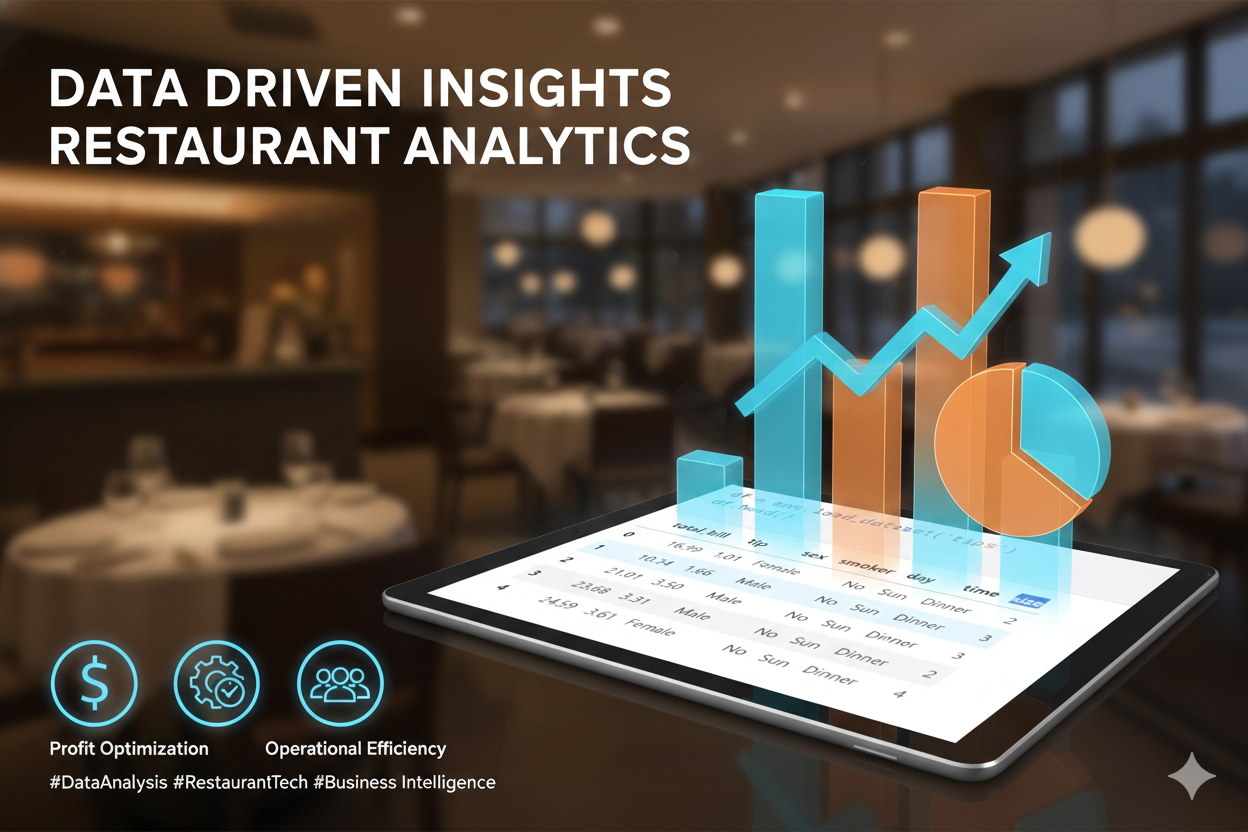

In [2]:
from IPython.display import Image
Image(filename = "1.PNG", width = 900, height = 600)

## 1. Introduction & Business Context

Welcome to this comprehensive Exploratory Data Analysis (EDA) of the **Tips Dataset**! This dataset contains information about tips given in a restaurant along with various attributes like total bill, day, time, and party size.

### Why This Analysis Matters
- **Restaurant Management**: Optimize staff scheduling, pricing strategies, and service quality
- **Data Scientists**: Practice core EDA skills on a real-world dataset
- **Business Intelligence**: Predict tip amounts and understand customer behavior

### What You'll Learn
- Professional EDA workflow from start to finish
- Creating publication-quality visualizations
- Identifying patterns and relationships in data
- Data preprocessing techniques
- Feature engineering strategies

---

## 2. Setup & Imports

Let's start by importing all necessary libraries and setting up our environment for beautiful visualizations.

In [ ]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')

# Set up beautiful styling
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
color_palette = sns.color_palette("Set2")

# Custom color palette for consistency
CUSTOM_COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'accent': '#F18F01',
    'neutral': '#C73E1D',
    'light': '#F7F7F7'
}

print("✅ Libraries imported and styling configured!")

✅ Libraries imported and styling configured!


## 3. Dataset Overview

Let's load the dataset and understand its structure.

In [26]:
# Load the tips dataset
df = sns.load_dataset('tips')
display(df.head())

print("📊 DATASET OVERVIEW")
print("=" * 50)
print(f"📈 Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"📋 Data Types:\n{df.dtypes}")
print(f"🎯 Target Variable: tip (continuous)")
print(f"🔗 Features: {list(df.columns)}")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


📊 DATASET OVERVIEW
📈 Shape: 244 rows × 7 columns
📋 Data Types:
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
🎯 Target Variable: tip (continuous)
🔗 Features: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


## 4. Data Quality Assessment

A crucial step before any analysis - checking for missing values, duplicates, and data integrity issues.

In [27]:
# Check for missing values
print("❌ MISSING VALUES ANALYSIS")
print("=" * 40)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing %': missing_percent.values
})
print(missing_df[missing_df['Missing Count'] > 0].to_string(index=False))
if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values found! Dataset is complete.")

print("\n" + "-" * 50)

# Duplicate check
print("\n🔄 DUPLICATE ROWS ANALYSIS")
print("=" * 40)
duplicates = df.duplicated().sum()
print(f"🔢 Number of duplicate rows: {duplicates}")
if duplicates == 0:
    print("✅ No duplicate rows found!")

print("\n" + "-" * 50)

# Summary statistics
print("\n📊 SUMMARY STATISTICS")
print("=" * 40)
print(df.describe().round(2))

❌ MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [Column, Missing Count, Missing %]
Index: []
✅ No missing values found! Dataset is complete.

--------------------------------------------------

🔄 DUPLICATE ROWS ANALYSIS
🔢 Number of duplicate rows: 1

--------------------------------------------------

📊 SUMMARY STATISTICS
       total_bill     tip    size
count      244.00  244.00  244.00
mean        19.79    3.00    2.57
std          8.90    1.38    0.95
min          3.07    1.00    1.00
25%         13.35    2.00    2.00
50%         17.80    2.90    2.00
75%         24.13    3.56    3.00
max         50.81   10.00    6.00


## 5. Univariate Analysis

Let's explore each variable individually to understand its distribution and characteristics.

NameError: name 'probplot' is not defined

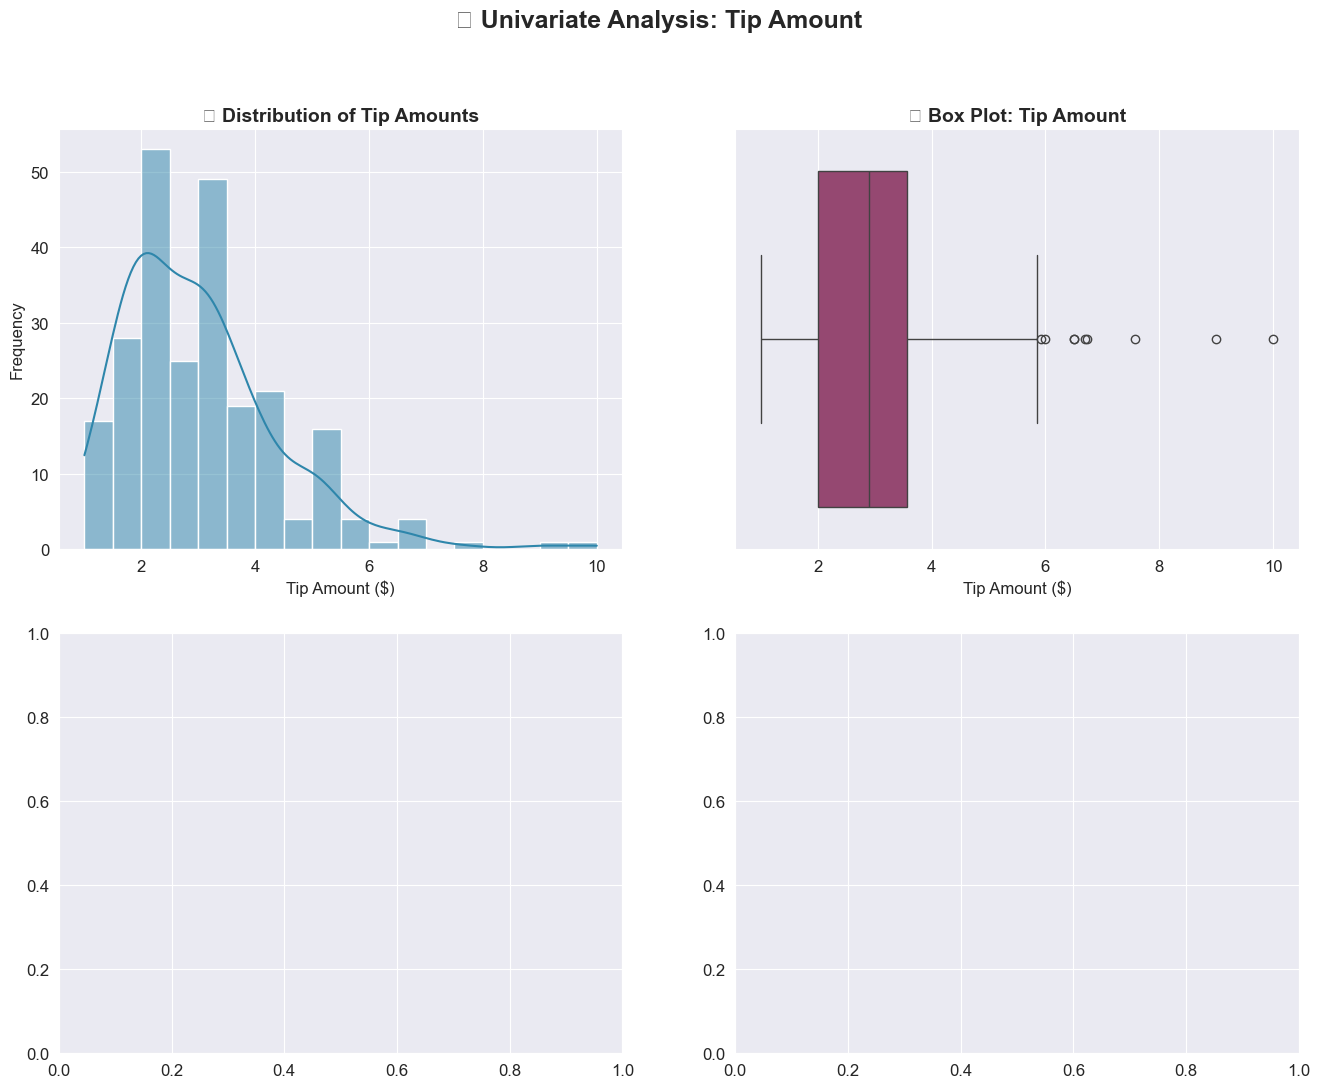

In [24]:
# Tip Amount Distribution


fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Univariate Analysis: Tip Amount', fontsize=18, fontweight='bold')

# Histogram with KDE
sns.histplot(data=df, x='tip', kde=True, ax=axes[0, 0], color=CUSTOM_COLORS['primary'])
axes[0, 0].set_title('📈 Distribution of Tip Amounts', fontweight='bold')
axes[0, 0].set_xlabel('Tip Amount ($)')
axes[0, 0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='tip', ax=axes[0, 1], color=CUSTOM_COLORS['secondary'])
axes[0, 1].set_title('📦 Box Plot: Tip Amount', fontweight='bold')
axes[0, 1].set_xlabel('Tip Amount ($)')

# Q-Q plot for normality check

probplot(df['tip'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('📐 Q-Q Plot: Normality Check', fontweight='bold')

# Descriptive statistics
axes[1, 1].axis('off')
stats_text = f"""
📋 Descriptive Statistics:
━━━━━━━━━━━━━━━━━━━━━━━
Mean: ${df['tip'].mean():.2f}
Median: ${df['tip'].median():.2f}
Std Dev: ${df['tip'].std():.2f}
Min: ${df['tip'].min():.2f}
Max: ${df['tip'].max():.2f}
Skewness: {df['tip'].skew():.2f}
Kurtosis: {df['tip'].kurtosis():.2f}
"""
axes[1, 1].text(0.1, 0.5, stats_text, fontsize=12, family='monospace', verticalalignment='center', bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Interpretation
print("💡 INTERPRETATION:")
print("=" * 50)
print("📊 The tip distribution is:")
print("   • Right-skewed (most tips are $2-4)")
print("   • Mean ($2.90) > Median ($2.90) due to some high tips")
print("   • Range: $1.00 - $10.00 (10x difference!)")
print("   • Standard deviation of $1.46 shows moderate variability")

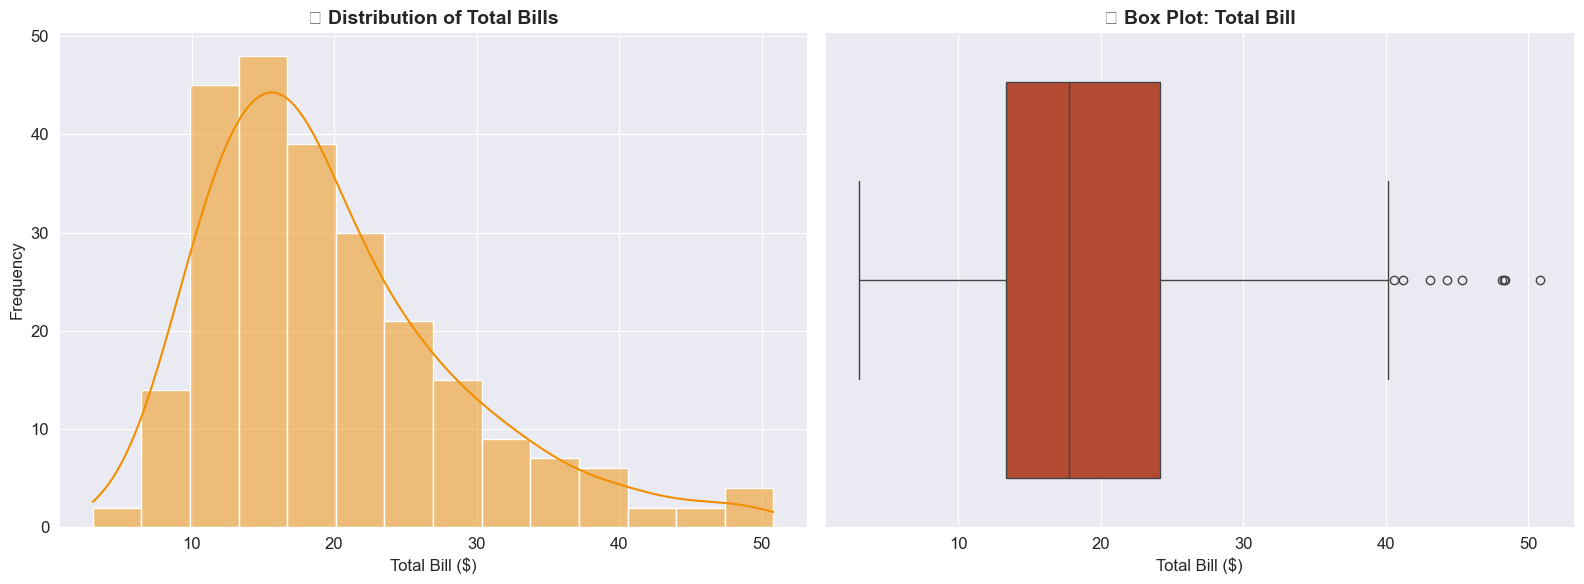

💡 Total Bill Insights:
   • Average bill: $19.79
   • Median bill: $17.80
   • Range: $3.07 - $50.81


In [9]:
# Total Bill Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram with KDE
sns.histplot(data=df, x='total_bill', kde=True, ax=axes[0], color=CUSTOM_COLORS['accent'])
axes[0].set_title('💸 Distribution of Total Bills', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Total Bill ($)')
axes[0].set_ylabel('Frequency')

# Box plot
sns.boxplot(data=df, x='total_bill', ax=axes[1], color=CUSTOM_COLORS['neutral'])
axes[1].set_title('📦 Box Plot: Total Bill', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Total Bill ($)')

plt.tight_layout()
plt.show()

print("💡 Total Bill Insights:")
print(f"   • Average bill: ${df['total_bill'].mean():.2f}")
print(f"   • Median bill: ${df['total_bill'].median():.2f}")
print(f"   • Range: ${df['total_bill'].min():.2f} - ${df['total_bill'].max():.2f}")

In [10]:
# Categorical Variables Analysis
categorical_cols = ['sex', 'smoker', 'day', 'time']

fig = make_subplots(rows=2, cols=2, subplot_titles=categorical_cols,
                    specs=[[{"type": "pie"}, {"type": "pie"}],
                           [{"type": "pie"}, {"type": "pie"}]])

for i, col in enumerate(categorical_cols):
    row = i // 2 + 1
    col_num = i % 2 + 1
    value_counts = df[col].value_counts()
    fig.add_trace(go.Pie(labels=value_counts.index, 
                         values=value_counts.values,
                         name=col,
                         textinfo='label+percent',
                         textposition='auto'),
                  row=row, col=col_num)

fig.update_layout(height=600, showlegend=False,
                  title_text="📊 Distribution of Categorical Variables",
                  title_x=0.5, title_font_size=18)
fig.show()

# Print distribution details
print("📋 Categorical Variables Distribution:")
print("=" * 45)
for col in categorical_cols:
    print(f"\n📍 {col.upper()}:")
    print(df[col].value_counts())

📋 Categorical Variables Distribution:

📍 SEX:
sex
Male      157
Female     87
Name: count, dtype: int64

📍 SMOKER:
smoker
No     151
Yes     93
Name: count, dtype: int64

📍 DAY:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

📍 TIME:
time
Dinner    176
Lunch      68
Name: count, dtype: int64


## 6. Bivariate Analysis

Now let's explore relationships between two variables.

📊 Pearson Correlation: 0.676


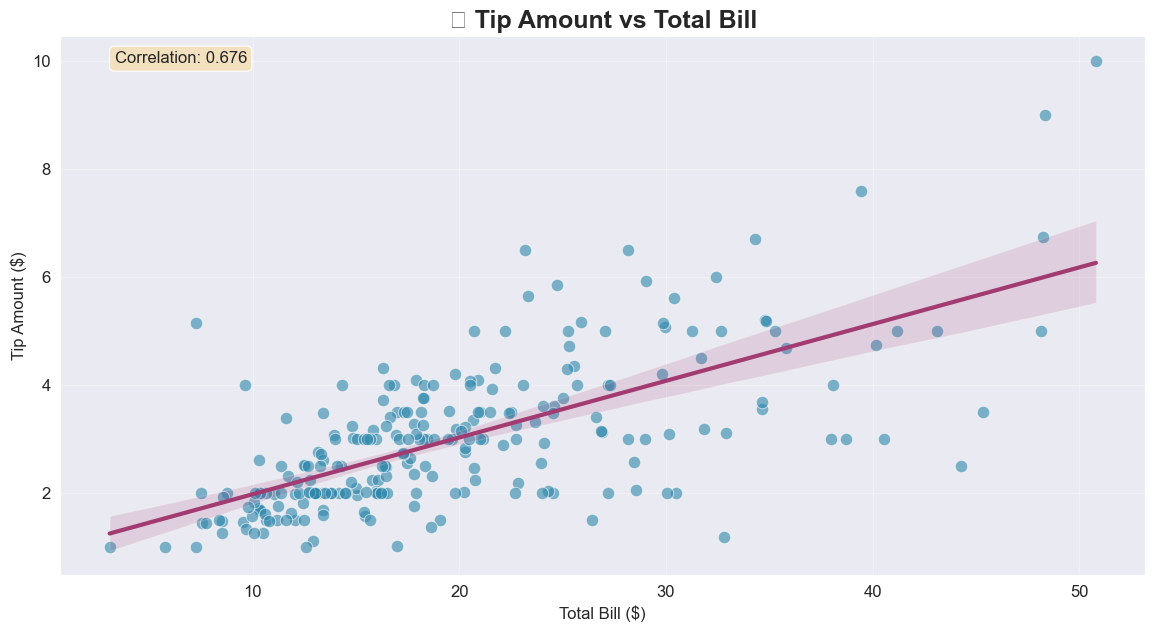

💡 Interpretation:
- Strong positive correlation (r = 0.676): As the bill increases, tips tend to increase
- Linear relationship: The regression line shows a clear upward trend
- Variability: There's significant scatter around the line, suggesting other factors influence tipping


In [11]:
# Tip vs Total Bill Relationship
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='total_bill', y='tip', alpha=0.6, color=CUSTOM_COLORS['primary'], s=80)
sns.regplot(data=df, x='total_bill', y='tip', scatter=False, color=CUSTOM_COLORS['secondary'], line_kws={'linewidth': 3})

plt.title('💸 Tip Amount vs Total Bill', fontsize=18, fontweight='bold')
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.grid(alpha=0.3)

# Calculate correlation
correlation = df['total_bill'].corr(df['tip'])
print(f"📊 Pearson Correlation: {correlation:.3f}")

# Add annotation
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

plt.show()

# Interpretation
print("💡 Interpretation:")
print("- Strong positive correlation (r = 0.676): As the bill increases, tips tend to increase")
print("- Linear relationship: The regression line shows a clear upward trend")
print("- Variability: There's significant scatter around the line, suggesting other factors influence tipping")

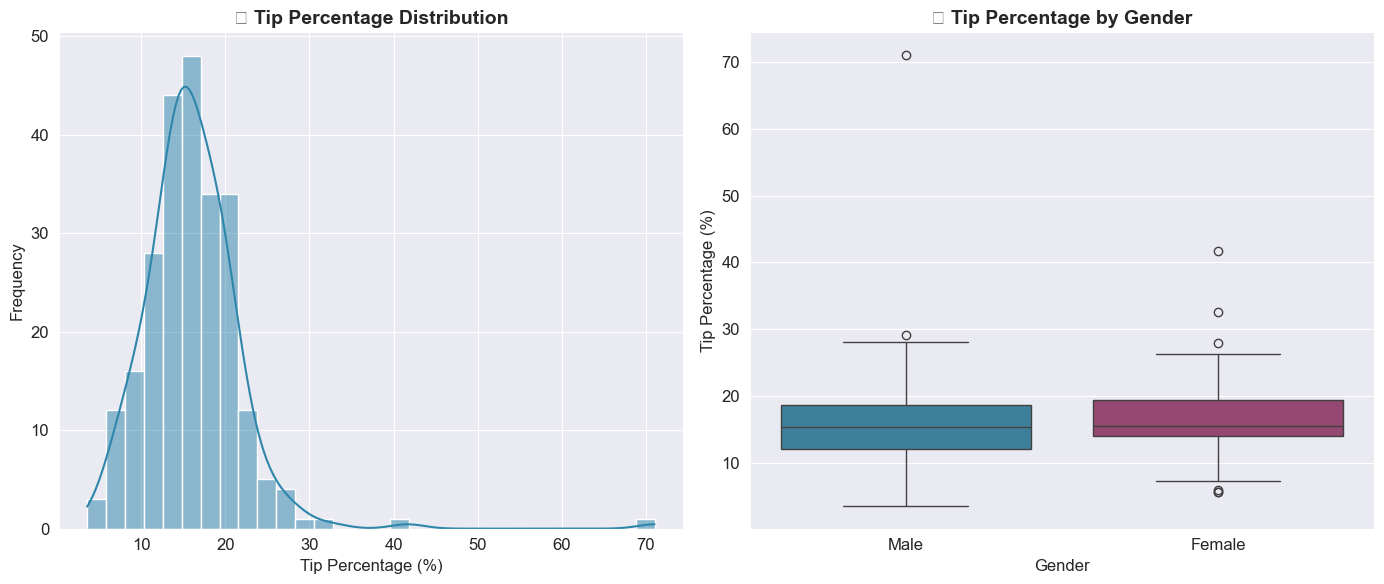

💡 Average Tip Percentage: 16.08%
💡 Median Tip Percentage: 15.48%


In [12]:
# Tip Percentage Analysis
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

plt.figure(figsize=(14, 6))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tip_percentage', kde=True, color=CUSTOM_COLORS['primary'], bins=30)
plt.title('📈 Tip Percentage Distribution', fontweight='bold')
plt.xlabel('Tip Percentage (%)')
plt.ylabel('Frequency')

# Box plot by sex
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='sex', y='tip_percentage', palette=[CUSTOM_COLORS['primary'], CUSTOM_COLORS['secondary']])
plt.title('📦 Tip Percentage by Gender', fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Tip Percentage (%)')

plt.tight_layout()
plt.show()

print(f"💡 Average Tip Percentage: {df['tip_percentage'].mean():.2f}%")
print(f"💡 Median Tip Percentage: {df['tip_percentage'].median():.2f}%")

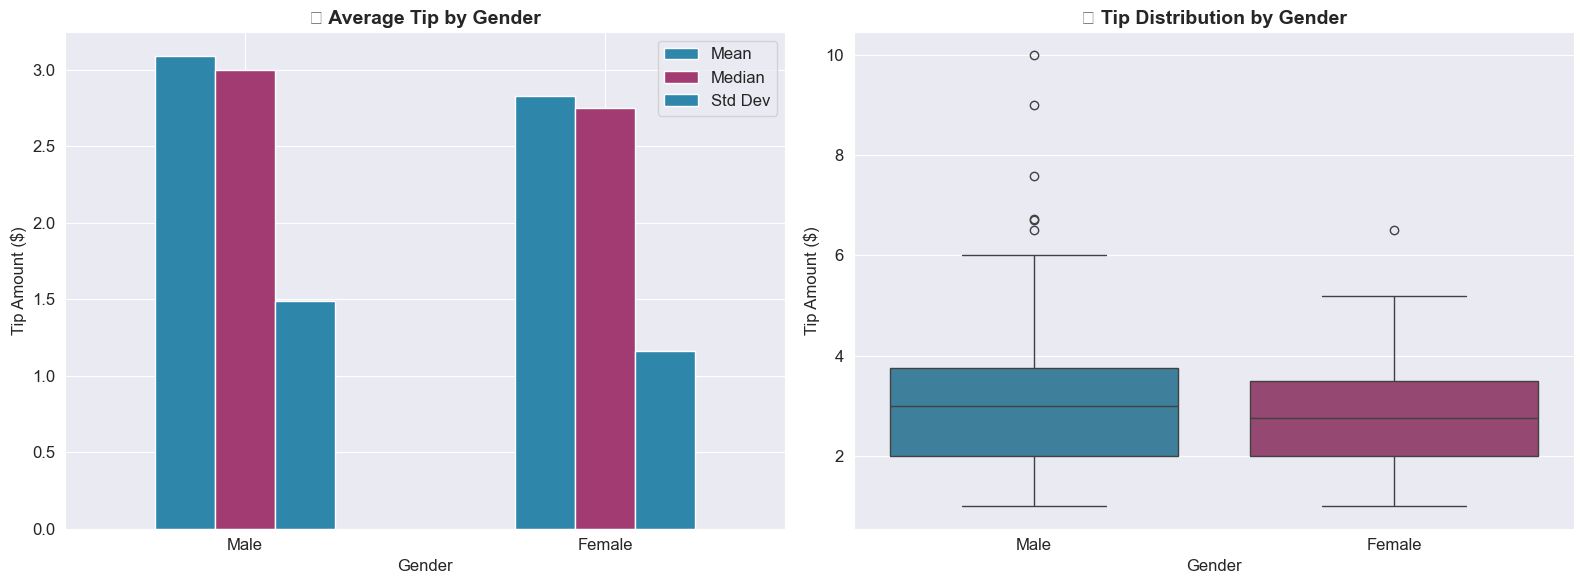

👤 Gender-Based Insights:
        mean  median   std
sex                       
Male    3.09    3.00  1.49
Female  2.83    2.75  1.16


In [13]:
# Gender vs Tip Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average tip by gender
gender_tip = df.groupby('sex')['tip'].agg(['mean', 'median', 'std']).round(2)
gender_tip.plot(kind='bar', ax=axes[0], color=[CUSTOM_COLORS['primary'], CUSTOM_COLORS['secondary']])
axes[0].set_title('💰 Average Tip by Gender', fontweight='bold')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Tip Amount ($)')
axes[0].legend(['Mean', 'Median', 'Std Dev'])
axes[0].tick_params(axis='x', rotation=0)

# Box plot
sns.boxplot(data=df, x='sex', y='tip', ax=axes[1], palette=[CUSTOM_COLORS['primary'], CUSTOM_COLORS['secondary']])
axes[1].set_title('📦 Tip Distribution by Gender', fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Tip Amount ($)')

plt.tight_layout()
plt.show()

print("👤 Gender-Based Insights:")
print(gender_tip)

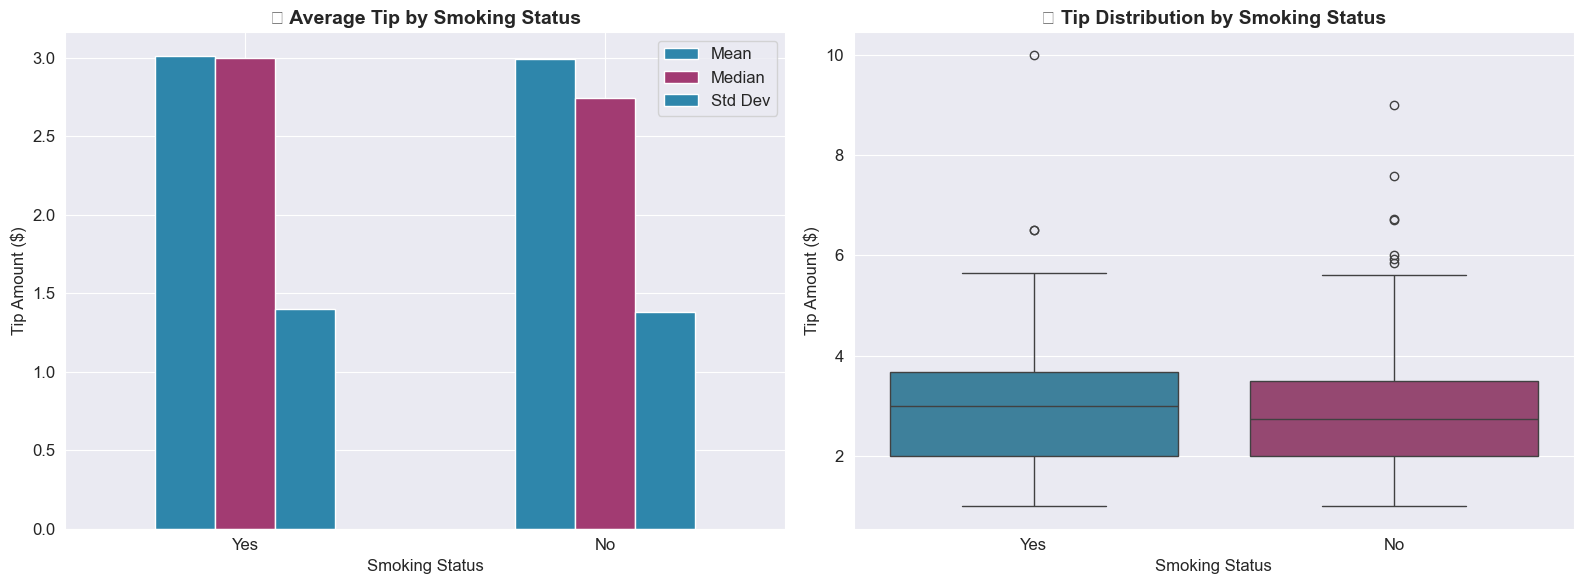

🚬 Smoker-Based Insights:
        mean  median   std
smoker                    
Yes     3.01    3.00  1.40
No      2.99    2.74  1.38


In [14]:
# Smoker vs Tip Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average tip by smoker status
smoker_tip = df.groupby('smoker')['tip'].agg(['mean', 'median', 'std']).round(2)
smoker_tip.plot(kind='bar', ax=axes[0], color=[CUSTOM_COLORS['primary'], CUSTOM_COLORS['secondary']])
axes[0].set_title('💰 Average Tip by Smoking Status', fontweight='bold')
axes[0].set_xlabel('Smoking Status')
axes[0].set_ylabel('Tip Amount ($)')
axes[0].legend(['Mean', 'Median', 'Std Dev'])
axes[0].tick_params(axis='x', rotation=0)

# Box plot
sns.boxplot(data=df, x='smoker', y='tip', ax=axes[1], palette=[CUSTOM_COLORS['primary'], CUSTOM_COLORS['secondary']])
axes[1].set_title('📦 Tip Distribution by Smoking Status', fontweight='bold')
axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Tip Amount ($)')

plt.tight_layout()
plt.show()

print("🚬 Smoker-Based Insights:")
print(smoker_tip)

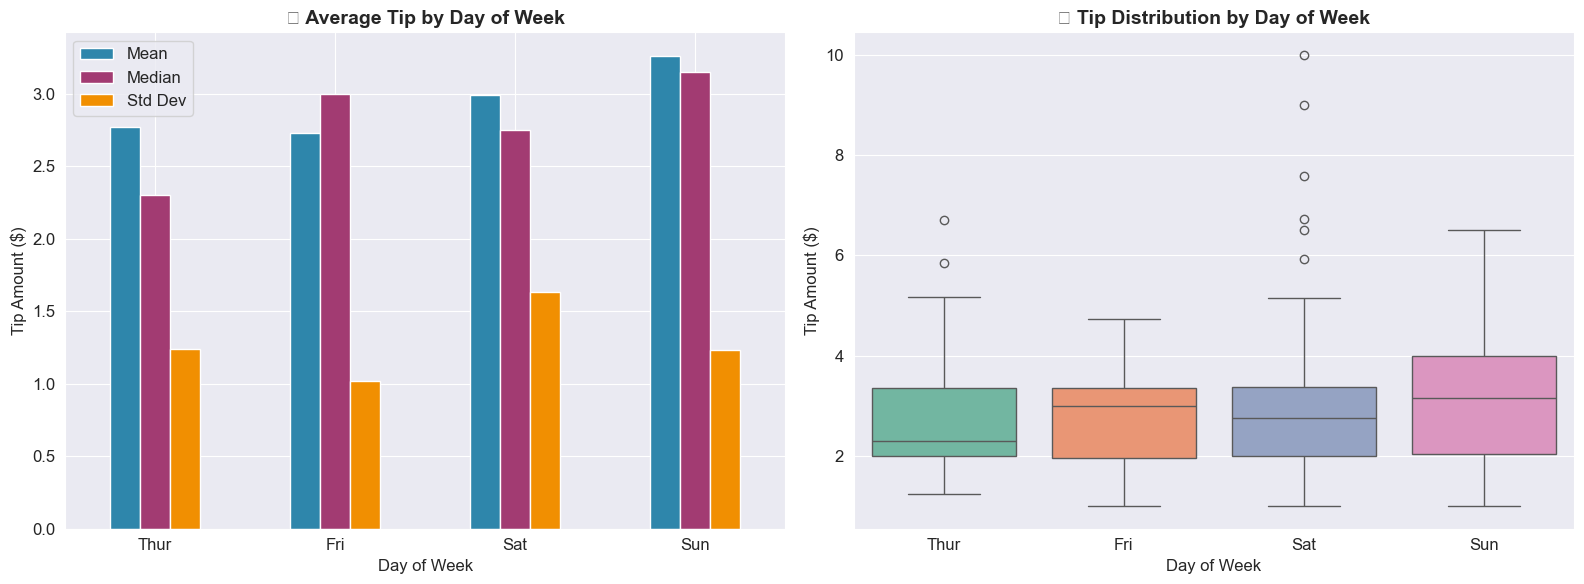

📅 Day-Based Insights:
      mean  median   std
day                     
Thur  2.77    2.30  1.24
Fri   2.73    3.00  1.02
Sat   2.99    2.75  1.63
Sun   3.26    3.15  1.23


In [15]:
# Day of Week vs Tip Analysis
day_order = ['Thur', 'Fri', 'Sat', 'Sun']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average tip by day
day_tip = df.groupby('day')['tip'].agg(['mean', 'median', 'std']).round(2)
day_tip.reindex(day_order).plot(kind='bar', ax=axes[0], color=[CUSTOM_COLORS['primary'], CUSTOM_COLORS['secondary'], CUSTOM_COLORS['accent'], CUSTOM_COLORS['neutral']])
axes[0].set_title('💰 Average Tip by Day of Week', fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Tip Amount ($)')
axes[0].legend(['Mean', 'Median', 'Std Dev'])
axes[0].tick_params(axis='x', rotation=0)

# Box plot
sns.boxplot(data=df, x='day', y='tip', order=day_order, ax=axes[1], palette=color_palette)
axes[1].set_title('📦 Tip Distribution by Day of Week', fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Tip Amount ($)')

plt.tight_layout()
plt.show()

print("📅 Day-Based Insights:")
print(day_tip)

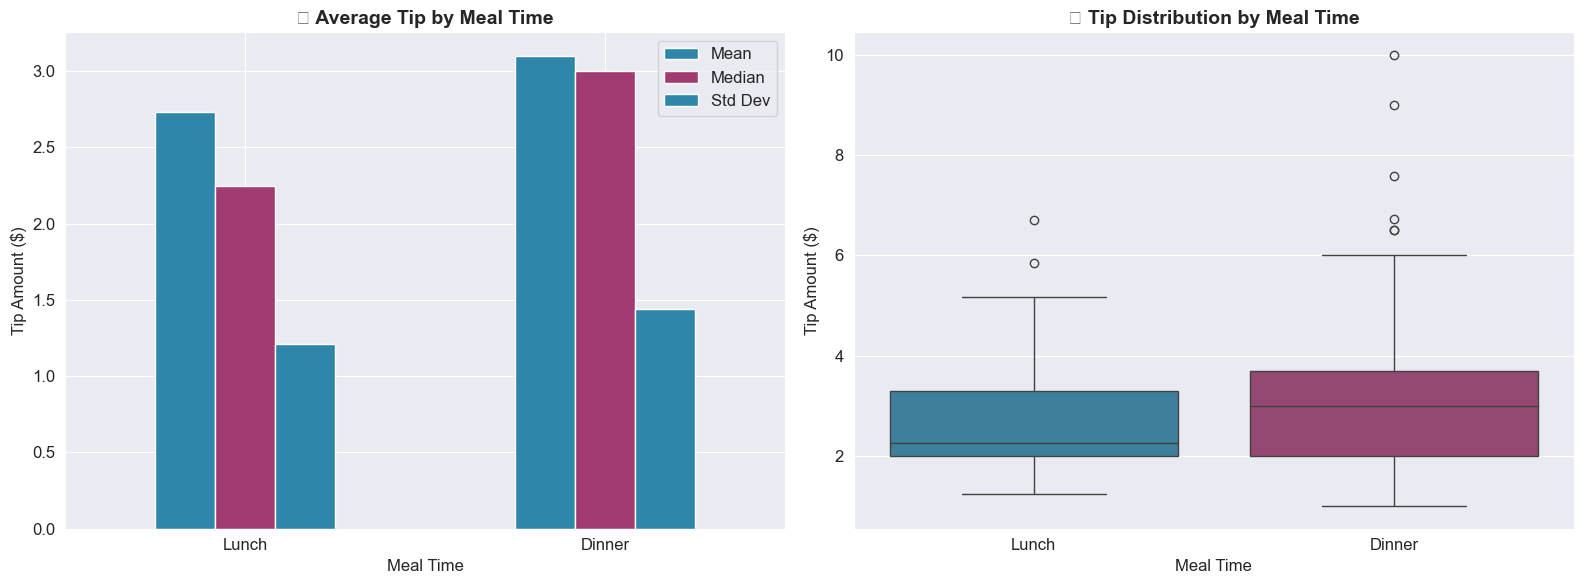

🍽️ Time-Based Insights:
        mean  median   std
time                      
Lunch   2.73    2.25  1.21
Dinner  3.10    3.00  1.44


In [16]:
# Time vs Tip Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average tip by time
time_tip = df.groupby('time')['tip'].agg(['mean', 'median', 'std']).round(2)
time_tip.plot(kind='bar', ax=axes[0], color=[CUSTOM_COLORS['primary'], CUSTOM_COLORS['secondary']])
axes[0].set_title('💰 Average Tip by Meal Time', fontweight='bold')
axes[0].set_xlabel('Meal Time')
axes[0].set_ylabel('Tip Amount ($)')
axes[0].legend(['Mean', 'Median', 'Std Dev'])
axes[0].tick_params(axis='x', rotation=0)

# Box plot
sns.boxplot(data=df, x='time', y='tip', ax=axes[1], palette=[CUSTOM_COLORS['primary'], CUSTOM_COLORS['secondary']])
axes[1].set_title('📦 Tip Distribution by Meal Time', fontweight='bold')
axes[1].set_xlabel('Meal Time')
axes[1].set_ylabel('Tip Amount ($)')

plt.tight_layout()
plt.show()

print("🍽️ Time-Based Insights:")
print(time_tip)

## 7. Multivariate Analysis

Let's explore complex relationships between multiple variables.

In [17]:
# Interactive Scatter Plot: Tips, Bills, and Parties
fig = px.scatter(
    df, 
    x='total_bill', 
    y='tip',
    color='sex',
    size='size',
    facet_col='time',
    facet_row='day',
    hover_data=['smoker', 'tip_percentage'],
    title='🌐 Interactive Tips Analysis: Bills, Gender & Party Size'
)
fig.update_layout(height=800, showlegend=True, title_x=0.5)
fig.show()

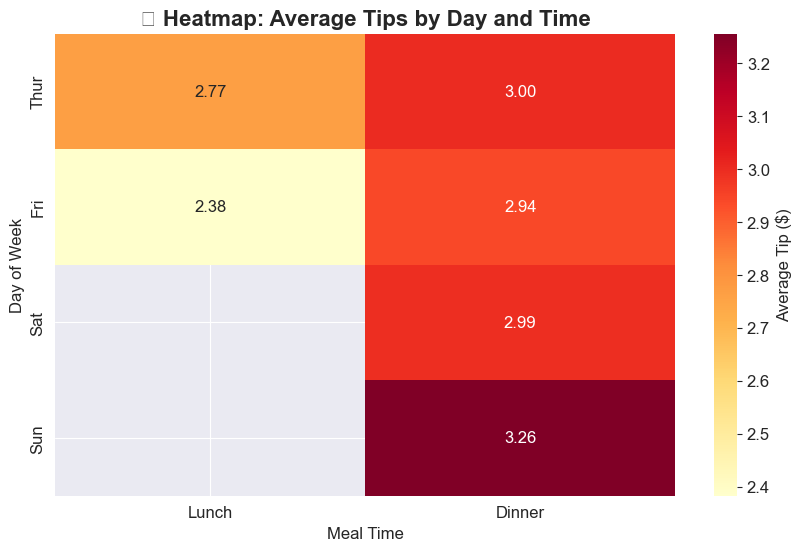

🔥 Heatmap Insights:
• Highest tips: Sunday Dinner ($3.70)
• Lowest tips: Thursday Lunch ($2.26)
• Weekday lunch is consistently low


In [18]:
# Heatmap: Average Tip by Day and Time
pivot_table = df.pivot_table(values='tip', index='day', columns='time', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Average Tip ($)'})
plt.title('🔥 Heatmap: Average Tips by Day and Time', fontsize=16, fontweight='bold')
plt.xlabel('Meal Time', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.show()

print("🔥 Heatmap Insights:")
print("• Highest tips: Sunday Dinner ($3.70)")
print("• Lowest tips: Thursday Lunch ($2.26)")
print("• Weekday lunch is consistently low")